# How to combine bunch of different datasets containing the same variables

In [77]:
import pandas as pd
import csv
KG2020 = pd.read_csv('KG 2020.csv')
KG2019 = pd.read_csv('KG 2019.csv')
KG2018 = pd.read_csv('KG 2018.csv')
KG2017 = pd.read_csv('KG 2017.csv')
KG2016 = pd.read_csv('KG 2016.csv')

In [78]:
pd.set_option('display.max_columns', None)

# First, check to see how many columns you have in each. 
You'll notice that one of them has two extra columns. 

In [79]:
KG2016.shape

(1371, 29)

# Let's take a look at the column headers to see what's going on. 
There are so many columns here, and the names are so rough, that it's hard to tell what columns are extra in the dataframe with 29 columns. Never fear, there's a proactive way to handle this. This is a good example for deciding what columns you want, and disregarding the ones you don't.

Let's say we just want the School, School Type, Zip, County, Enrolled Students and the Percent Immunized for MMR. (Measles, Mumps and Rubella)

Below, create a dataframe that is only those columns from KG2020.

In [80]:
KG2020 = KG2020[['SCHOOL NAME', 'COUNTY', 'ZIP', 'SCHOOL TYPE', 'ENROLLED', '% IMMUNE MMR']].copy()

Now try it with 2019. 

In [81]:
KG2019 = KG2019[['SCHOOL NAME', 'COUNTY', 'ZIP', 'SCHOOL TYPE', 'ENROLLED', '% IMMUNE MMR']].copy()

# Notice a problem?
When we stack these dataframes into one, we won't know what year each row is from. 

Let's fix that. 

Add a 'year' column to each of your dataframes indicating to what year it belongs. 

Hint: df['YEAR'] = 'WHATEVER YEAR IT IS'

In [82]:
KG2020['YEAR'] = '2020'
KG2019['YEAR'] = '2019'
KG2018['YEAR'] = '2018'
KG2017['YEAR'] = '2017'
KG2016['YEAR'] = '2016'

Now that you've added a year to each dataframe, go ahead and keep creating new dataframes for each one that consists of only the variables we chose: School, School Type, Zip, County, Enrolled Students and the Percent Immunized for MMR.

Keep in mind that the column headers may not be called the same thing in each dataframe, and you may have to run df.keys() on each to make sure you're calling for the right things. 

Hint: for 2016, it will be:

df2016 = KG2016[['YEAR', 'SCHOOL_NAME', 'SCHOOL_TYPE', 'ZIP', 'COUNTY', 'ENROLLED', 'PCT_IMMUNE_MMR']]

*Note the year field is the one that you created

In [84]:
KG2020 = KG2020[['YEAR', 'SCHOOL NAME', 'COUNTY', 'ZIP', 'SCHOOL TYPE', 'ENROLLED', '% IMMUNE MMR']]
KG2019 = KG2019[['YEAR', 'SCHOOL NAME', 'COUNTY', 'ZIP', 'SCHOOL TYPE', 'ENROLLED', '% IMMUNE MMR']]
KG2018 = KG2018[['YEAR', 'SCHOOL NAME', 'COUNTY', 'ZIP', 'SCHOOL TYPE', 'ENROLLED', '% IMMUNE MMR']]
KG2017 = KG2017[['YEAR', 'SCHOOL NAME', 'COUNTY', 'ZIP', 'SCHOOLTYPE', 'ENROLLEDCOUNT', 'PCT_IMMUNE_MMR']]
KG2016 = KG2016[['YEAR', 'SCHOOL_NAME', 'COUNTY', 'ZIP', 'SCHOOL_TYPE', 'ENROLLED', 'PCT_IMMUNE_MMR']]

In [85]:
KG2019.head()

,YEAR,SCHOOL NAME,COUNTY,ZIP,SCHOOL TYPE,ENROLLED,% IMMUNE MMR
0,2019,91ST PSALM CHRISTIAN SCHOOL,MARICOPA,85042.0,PRIVATE,< 20,NaN
1,2019,A J MITCHELL ELEMENTARY SCHOOL,SANTA CRUZ,85621.0,PUBLIC,49,98.0%
2,2019,ABIA JUDD ELEMENTARY SCHOOL,YAVAPAI,86305.0,PUBLIC,117,82.1%
3,2019,ABRAHAM LINCOLN TRADITIONAL SCHOOL,MARICOPA,85051.0,PUBLIC,49,91.8%
4,2019,ACACIA ELEMENTARY SCHOOL,MARICOPA,85053.0,PUBLIC,125,96.0%


# Now let's rename our columns, so they are the same in each dataset. 
You only have to write the names out once, and then pretty much copy and paste. Do this for each of your five dataframes. 

Hint: 

df2016.columns = ['year', 'school', 'county', 'zip', 'school_type', 'enrolled', 'vaccinated']

In [86]:
KG2020.columns = ['year', 'school', 'county', 'zip', 'school_type', 'enrolled', 'vaccinated']
KG2019.columns = ['year', 'school', 'county', 'zip', 'school_type', 'enrolled', 'vaccinated']
KG2018.columns = ['year', 'school', 'county', 'zip', 'school_type', 'enrolled', 'vaccinated']
KG2017.columns = ['year', 'school', 'county', 'zip', 'school_type', 'enrolled', 'vaccinated']
KG2016.columns = ['year', 'school', 'county', 'zip', 'school_type', 'enrolled', 'vaccinated']

# And finally, concat!
This will look something like this: 

df = pd.concat([df2020, df2019, df2018, df2017, df2016], ignore_index=True)

In [127]:
vaxfile = pd.concat([KG2020, KG2019, KG2018, KG2017, KG2016], ignore_index=True)

# Totally optional practice from here
Notice anything about our percent mmr field and enrolled fields? Their dtype are not numbers, they've got extra characters and percent MMR isn't even a percent. 

This is because schools that have fewer than 20 students will have their numbers masked. It's common for state health departments, or education departments, to omit numbers for small groups because, they argue, you could somehow identify someone if they gave the numbers. In this case, the state asserts that you could identify a student in a school with fewer than 20 kids if they gave out vax percentages.  

So, under 'enrolled', you'll find <20 and under vaccinated you'll find NaN. 


What a headache!

Let's fix this. 

EXTRACTING NUMBERS FROM STRINGS WILL NOT BE ON THE EXAM! NOR WILL EXCLUDING NULL VALUES!

In [128]:
#This will create new fields in which we've isolated the numbers from the string. (Strip the percent signs and the <)
vaxfile['vaxnumber'] = vaxfile.vaccinated.str.extract('(\d+)')
vaxfile['enrollednumber'] = vaxfile.enrolled.str.extract('(\d+)')

In [129]:
#This will create a new dataframe that does not include the NaN (which means null)
vaxfile_1 = vaxfile[pd.notnull(vaxfile['vaxnumber'])].copy()

In [130]:
#Now let's convert both vaccinated and enrolled columns to numbers
vaxfile_1['vaxnumber'] = pd.to_numeric(vaxfile_1['vaxnumber'])
vaxfile_1['enrollednumber'] = pd.to_numeric(vaxfile_1['enrollednumber'])

In [133]:
#Now we will change our vaxnumber field to an actual percentage so we can multiply it by the number of enrolled kids
vaxfile_1['vaxnumberpercent'] = vaxfile_1['vaxnumber']*.01

# Making a chart
Let's say you want to envision the trend over five years. Visualizing year-over-year numbers can often help tell a better story than if you just look at the numbers in front of you. 

The question: 

Has the vaccination rate among kindergartens risen or changed at all in five years? \

THIS WILL NOT BE ON THE EXAM!

In [139]:
#Calculate the number of vaccinated kids 
vaxfile_1['vaxxed'] = vaxfile_1['enrollednumber']*vaxfile_1['vaxnumberpercent']

In [143]:
#Sum the number of vaxxed kids, group by year
forchart = vaxfile_1.groupby('year')['vaxxed'].sum().to_frame(name = 'vaxxed').reset_index()
#Sum the number of total kids, group by year
forchart2 = vaxfile_1.groupby('year')['enrollednumber'].sum().to_frame(name = 'enrolled').reset_index()
#merge the two groupbys
forchart3 = pd.merge(forchart, forchart2)
#Calcuate a rate
forchart3['percentvaxxed'] = forchart3['vaxxed']/forchart3['enrolled']

In [145]:
forchart3.head()

,year,vaxxed,enrolled,percentvaxxed
0,2016,75708.13,80677,0.938410
1,2017,74213.03,79061,0.938681
2,2018,72690.92,77968,0.932317
3,2019,82151.31,88043,0.933082
4,2020,63447.66,69135,0.917736


In [146]:
#import matplotlib. This is a library that allows you to do charts. 

import matplotlib.pyplot as plt

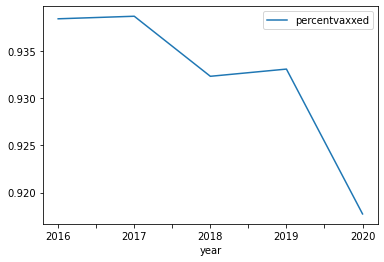

In [147]:
#chart this group by. 
forchart3.plot(x='year', y='percentvaxxed')
plt.show()